# Data Science

Python is the [language of choice](https://www.quora.com/Why-is-Python-a-language-of-choice-for-data-scientists) for [Data Science](https://en.wikipedia.org/wiki/Data_science). In fact, there exists tons of powerful and well-maintained libraries to support you. We will introduce the most useful ones in this notebook.

## Numpy

If you know Matlab, [Numpy](http://www.numpy.org) provides similar ease of use for $N$-dimensional array operations (slicing, dicing, mapping, ...). Moreover, it provides tons of tools for linear algebra, probability and statistics. You really cannot do scientific computing without `numpy`!

In [3]:
import numpy as np

### Arrays

Numpy `array`s are upgraded versions of Python `list`s. They are the foundations of the library and come with a bunch of methods that allow various operations.

In [4]:
numpy_array = np.array([[1, 3, 5], [2, 4, 6]])
print(numpy_array)
print("The shape of this array is:", numpy_array.shape)
first_element = numpy_array[0, 0]
first_column = numpy_array[:, 0]
second_row = numpy_array[1, :]
print("The first element is", first_element)
print("The first column is", first_column)
print("The second row is", second_row)

[[1 3 5]
 [2 4 6]]
The shape of this array is: (2, 3)
The first element is 1
The first column is [1 2]
The second row is [2 4 6]


Numpy arrays behave like "normal" numbers, meaning that operations are performed **element-wise**.

In [5]:
zeros = np.zeros(10)
ones = np.ones(10)
print(zeros + ones)
print(np.exp(zeros) + ones)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


It is then easy to create random vectors and perform linear algebra operations, such as $A\mathbf{b}$ or $\mathbf{x} = A^{-1}\mathbf{b}$. 

In [5]:
A = np.random.randint(low=0, high=10, size=(5, 5))
b = np.random.randint(low=0, high=10, size=(5, 1))
print("A =\n", A)
print("b =\n", b)
print("The vectorial product Ab is\n", A.dot(b))
print("The solution to Ax = b is x =\n", np.linalg.solve(A, b))

A =
 [[3 0 1 0 4]
 [8 0 1 5 6]
 [5 8 3 2 2]
 [2 6 5 0 6]
 [4 8 1 4 1]]
b =
 [[9]
 [0]
 [2]
 [6]
 [6]]
The vectorial product Ab is
 [[ 53]
 [140]
 [ 75]
 [ 64]
 [ 68]]
The solution to Ax = b is x =
 [[-0.25 ]
 [ 2.875]
 [-7.25 ]
 [-3.25 ]
 [ 4.25 ]]


Try to compute the mean and the variance of the vector $\mathbf{b}$.

*Hint:* have a look at the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [13]:
moyenne =  np.sum(b)/np.size(b)
print("Mean:",moyenne)
print("Variance:", np.sum((b-moyenne)**2)/np.size(b) )

Mean: 4.6
Variance: 10.24


Something that you will probably need at some point is to control the [random state](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState) of numpy. For instance if you are randomly initializing some parameters, but you would like to compare different runs of the same piece of code, you can fix the *seed* for the random generator. This will still produce random numbers, but each time the same! We say it is some *predictable randomness*.

In [14]:
# Fix the seed
np.random.seed(0)
print(np.random.permutation(10))
# Reset the seed
np.random.seed(0)
print(np.random.permutation(10))
# The two above permutations are the same
# The sequence of the random generator is now initialized
print(np.random.permutation(10))

[2 8 4 9 1 6 7 3 0 5]
[2 8 4 9 1 6 7 3 0 5]
[3 5 1 2 9 8 0 6 7 4]


## Matplotlib

[Matpotlib](http://matplotlib.org/) is the most famous library to plot data. It is sometimes tedious to use, yet very powerful. It becomes however very interesting when combined with notebooks like this as you have the possibility to display your plot *inline*. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

We show here an example of three basic functions plotted on the same graph. As you see, it is quite verbose to obtain a simple plot like this. Try to play with the different options of the `plot` function: change the color of the lines, their width, the markers, ...

*Hint:* http://matplotlib.org/api/pyplot_api.html?highlight=plot#matplotlib.pyplot.plot

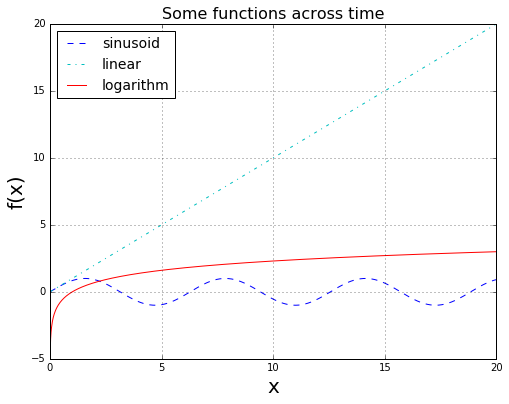

In [31]:
x = np.linspace(start=0.01, stop=20, num=1000)
# Generate some data
sin = np.sin(x)
lin = x
log = np.log(x)
# Create a new figure
plt.figure(figsize=(8, 6))
# Plot the data
plt.plot(x, sin,'b--')
plt.plot(x, lin, 'c-.')
plt.plot(x, log, 'r')
# Customize the plot
plt.title("Some functions across time", fontsize=16)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.legend(["sinusoid", "linear", "logarithm"], loc='upper left', fontsize=14)
plt.grid()
# Display the result
plt.show()

*Note*: in your reports and papers (at university and later during your engineering carreer), whenever displaying a plot, **always** set the

* title
* x and y labels
* legend
* caption

Be also sure that the font is big enough to be easily read by anyone with normal vision, and that each line has a different color (and ideally, markers). This a some very good habit to aquire, and one that will put you ahead of most of your fellow students, colleagues and competitors.

## NetworkX

[NetworkX](https://networkx.github.io) is a Python library for the creation, manipulation, and study of the structure, dynamics, and functions of networks. It provides a lot of functions to compute metrics from networks and to visualze them.

In [32]:
import networkx as nx

You can easily load networks from different sources, for instance using an [adjacency list](https://en.wikipedia.org/wiki/Adjacency_list).

In [33]:
G = nx.read_adjlist('data/adjacency_list.nx')

Visualize it by `draw`ing it.

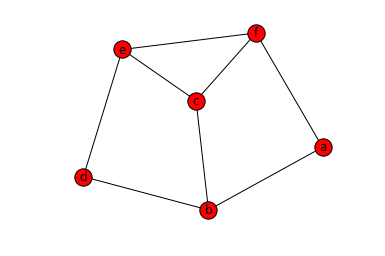

In [34]:
nx.draw_networkx(G)
plt.axis('off'); # Makes the plot slightly nicer

You can add nodes.

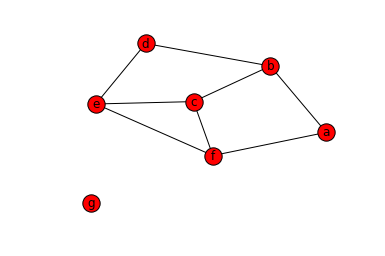

In [35]:
G.add_node('g')

nx.draw_networkx(G)
plt.axis('off');

And edges.

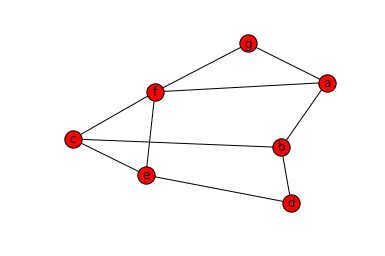

In [36]:
G.add_edge('g', 'a')
G.add_edge('g', 'f')

nx.draw_networkx(G)
plt.axis('off');

A lot of different [algorithms](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html) on graphs are already implemented and ready to use.

In [37]:
print("Diameter =", nx.diameter(G))
print("Shortest path between node g and node d:", nx.shortest_path(G, 'g', 'd'))
print("Cliques of three nodes and more:")
for clique in nx.enumerate_all_cliques(G):
    if len(clique) > 2:  # Only clique of at least 3 nodes
        print(clique)

Diameter = 3
Shortest path between node g and node d: ['g', 'f', 'e', 'd']
Cliques of three nodes and more:
['a', 'f', 'g']
['e', 'f', 'c']


You can find more examples of NetworkX here: https://networkx.readthedocs.io/en/stable/examples/index.html.

## More Libraries

You have seen now the required libraries to follow this class. We present here some optional ones, but ones that you will most likely make use of if you follow the path of data science, machine learning, statistics and/or data mining.

* [Pandas](http://pandas.pydata.org): consolidate data from various sources, move them around and analyze them easily
* [SciPy](http://www.scipy.org): extends numpy with more scientific computing tools (such as probability distributions, sparse matrices, optimization routines, ...)
* [scikit-learn](http://scikit-learn.org/stable/): state-of-the-art machine learning algorithms
* [TensorFlow](https://www.tensorflow.org): Google's machine learning library, focusing of deep learning, and based on computational graphs 
* [Bokeh](http://bokeh.pydata.org/en/latest/): more advanced, interactive visualization

## Exercises

Now, your turn to put your hands in the code!

### Linear Algebra: Matrix Standardization

The process of *standardization* is a very useful preprocessing operation that is even mandatory for some techniques (you will see that later). Formally, a matrix $X$ of size $N \times M$ is said to be *standardized* if its columns have $0$ mean and unitary standard deviation. Note that, when dealing with data, the number of data samples is commonly denoted by $N$ and the number of features of each sample is denoted by $M$. 

In this exercise, you have scraped data from the Swiss Confederation website and created a matrix of vote results. More precisely, every row in the matrix corresponds to a federal vote (popular initiative or referendum) and the columns are some features related to the municipalities. There are $N=307$ votes and $M=2289$ features. You heard that Switzerland has distinct voting patterns according to the different languages and would like to verify this hypothesis with a data-driven approach. A common procedure is to perform [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (more on that in a few weeks) for which the data must be standardized. 

1. Try to understand why we standardize **column-wise** and what it would mean to standardize row-wise. 
2. Standardize the matrix X.
3. Verify your code by interpreting the result.



In [5]:
X = np.load('data/votes-data.npy')

In [8]:
# Put your code to standardize the data here
X = (X- X.mean(axis=0)) / X.std(axis=0)

The following method takes your preprocesed matrix `X` as argument and displays a projection of the the data on the two first eigen vectors. 

- Do you see any interesting pattern?

*Hint:* You should be able to obtain the same image as below:

![Roestigraben pattern](images/roestigraben.png "Plot to obtain")

Add color to your plot by setting `with_color=True` in `extract_voting_pattern`.

- Does it confirm your intuition?

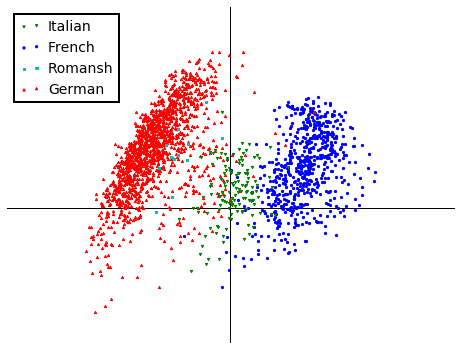

In [12]:
from modules.politics import extract_voting_pattern

extract_voting_pattern(X, with_color = True)
plt.show()

### Probabilities: Histogram of a distribution

We created three vectors of random samples.

- Can you guess from which distributions they have been generated?

*Hint*: recall that a [histogram](https://en.wikipedia.org/wiki/Histogram) represents a distribution.

In [38]:
distribution1 = np.load('data/distribution1.npy')
distribution2 = np.load('data/distribution2.npy')
distribution3 = np.load('data/distribution3.npy')

Use the following cell:

(array([   19.,   124.,   566.,  1550.,  2513.,  2618.,  1659.,   733.,
          185.,    33.]),
 array([-3.57712231, -2.87209893, -2.16707555, -1.46205217, -0.75702879,
        -0.05200541,  0.65301797,  1.35804135,  2.06306473,  2.76808811,
         3.47311149]),
 <a list of 10 Patch objects>)

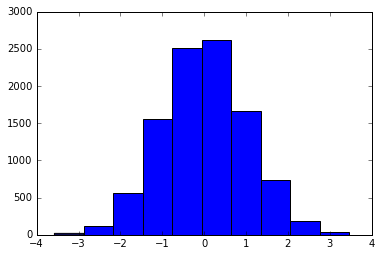

In [47]:
plt.hist(distribution1)

## Going further

If you want to learn more about Python for Data Science, the full O'Reilly's [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) book is available for free in the form of...notebooks on GitHub. A great ressource if you want to continue in this field!